In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

## 📌 Project Overview

This project uses Linear Regression from scikit-learn to predict house prices based on key numerical features such as living area, basement size, garage size, and quality rating. The dataset used is from the Kaggle competition: *House Prices - Advanced Regression Techniques*.


In [1]:
# 📚 Step 1: Import Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score


## 📥 Step 2: Load the Dataset

We load the `train.csv` file from Kaggle's built-in dataset directory.


In [2]:
# Load the dataset
df = pd.read_csv("/kaggle/input/linear-regression/train (1).csv")
df.head()


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


## 🧼 Step 3: Select and Prepare Features

We’ll use a few numeric columns for simplicity:
- `GrLivArea`: Above ground living area (sq ft)
- `OverallQual`: Overall quality (1–10)
- `GarageCars`: Size of garage in car capacity
- `TotalBsmtSF`: Basement square footage

Target variable: `SalePrice`


In [3]:
# Select features and target
features = ['GrLivArea', 'OverallQual', 'GarageCars', 'TotalBsmtSF']
target = 'SalePrice'

# Drop rows with missing values in selected columns
df = df[features + [target]].dropna()

# Input and Output
X = df[features]
y = df[target]

## ✂️ Step 4: Train-Test Split

Split the data into 80% training and 20% testing.


In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## 🧠 Step 5: Train the Linear Regression Model

In [5]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

## 📈 Step 6: Make Predictions & Evaluate


In [6]:
# Predict on test set
y_pred = model.predict(X_test)

# Evaluation
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("✅ RMSE:", round(rmse, 2))
print("✅ R² Score:", round(r2, 4))

✅ RMSE: 40036.42
✅ R² Score: 0.791


In [7]:
## 📊 Step 7: Visualization - Actual vs Predicted Sale Price

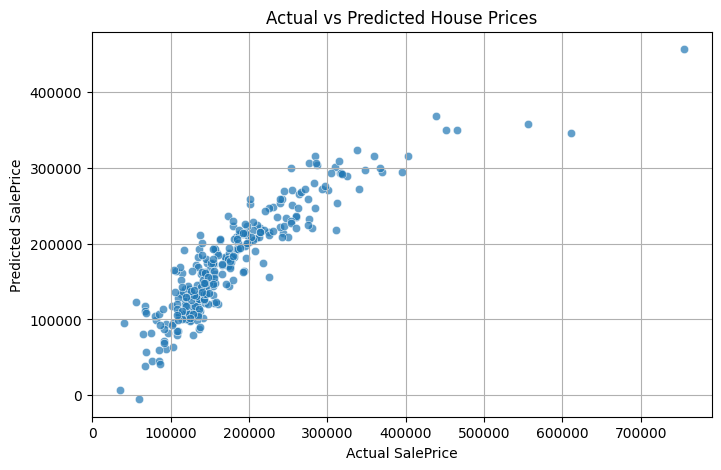

In [8]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.7)
plt.xlabel("Actual SalePrice")
plt.ylabel("Predicted SalePrice")
plt.title("Actual vs Predicted House Prices")
plt.grid(True)
plt.show()

## ✅ Conclusion

We built a basic Linear Regression model to predict house prices using numerical features. This model gives a baseline for performance and can be further improved by adding feature engineering, log-transformations, or using regularization techniques.

Next Steps:
- Handle categorical variables
- Feature scaling
- Try advanced models like Ridge, Lasso, or XGBoost